In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

### Generate and plot the data

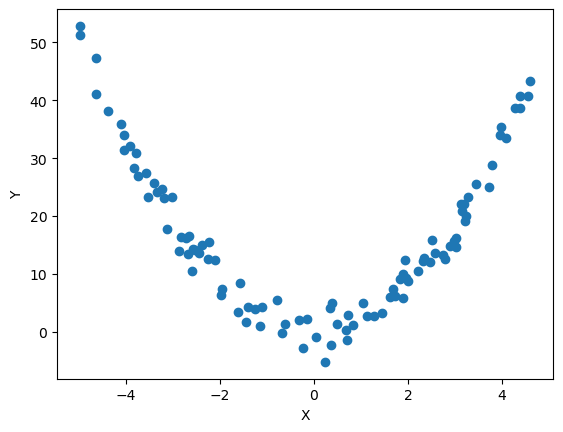

In [12]:
# Define the number of data points
num_points = 100

# Generate random x values between 0 and 10
X = 10 * (np.random.rand(num_points, 1)- 0.5)

# Generate y values using a polynomial equation with some noise
# You can adjust the coefficients as needed
coefficients = [2, -3, 1]  # Example coefficients for a quadratic equation

# Calculate the y values directly using the polynomial equation
y = coefficients[0] * X**2 + coefficients[2] + np.random.randn(num_points, 1)*2

# Plot the generated data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Generate polynomial features

In [26]:
#poly_features = PolynomialFeatures(degree=100)
poly_features = PolynomialFeatures(degree=2)

x_poly = poly_features.fit_transform(X)

In [27]:
X_train , X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

### Plot each polynomial feature relation with y

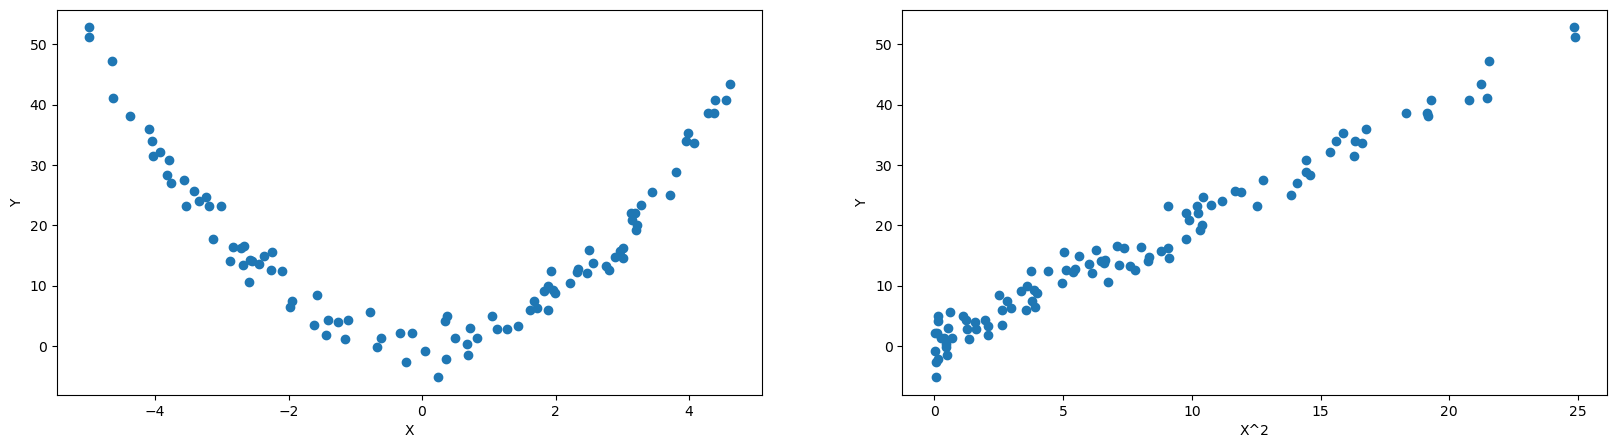

In [28]:
fig , ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].scatter(x_poly[:, 1], y, label='X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(x_poly[:, 2], y, label='X')
ax[1].set_xlabel('X^2')
ax[1].set_ylabel('Y')

plt.show()

### Plot the polynomial features training data

In [29]:
fig = go.Figure(data=[go.Scatter3d(x=x_poly[:,1], y=x_poly[:,2], z=y.flatten(), mode='markers', marker=dict(size=5))])

# Customize the layout
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='X^2', zaxis_title='Y'),
                  title='3D Scatter Plot of X, X^2, and Y')

# Show the plot
fig.show()

In [30]:
# Fit a linear model
model = LinearRegression()
model.fit(X_train[:,1:], y_train)

LinearRegression()

In [31]:
y_pred= model.predict(X_train[:,1:])

r2_score(y_train, y_pred)

0.9757459378372707

In [32]:
y_pred= model.predict(X_test[:,1:])

r2_score(y_test, y_pred)

0.9628453735465704

### Plot the predection plan

In [33]:
# Generate values for the x and y axes
x_values = x_poly[:, 1]
y_values = x_poly[:, 2]

# Predict y values using the fitted model
predicted_y = model.predict(x_poly[:, 1:])

# Create a scatter plot for the actual data
scatter_actual = go.Scatter3d(
    x=x_values,
    y=y_values,
    z=y.flatten(),
    mode='markers',
    marker=dict(size=4, opacity=0.7, color='blue'),
    name='Actual Data'
)

# Create a surface plot for the predicted plane
x_range = np.linspace(min(x_values), max(x_values), 100)
y_range = np.linspace(min(y_values), max(y_values), 100)
x_range, y_range = np.meshgrid(x_range, y_range)
z_range = model.predict(np.column_stack((x_range.ravel(), y_range.ravel())))
z_range = z_range.reshape(x_range.shape)

surface_predicted = go.Surface(
    x=x_range,
    y=y_range,
    z=z_range,
    colorscale='Viridis',
    opacity=0.6,
    name='Predicted Plane'
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='X^2'),
        zaxis=dict(title='Y')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create the figure and add the scatter and surface plots
fig = go.Figure(data=[scatter_actual, surface_predicted], layout=layout)

# Show the plot
fig.show()

In [34]:
model.coef_

array([[-0.04496451,  2.01740691]])

In [35]:
model.intercept_

array([0.52898859])

Y= -0.045*X+2.017*X^2+0.52

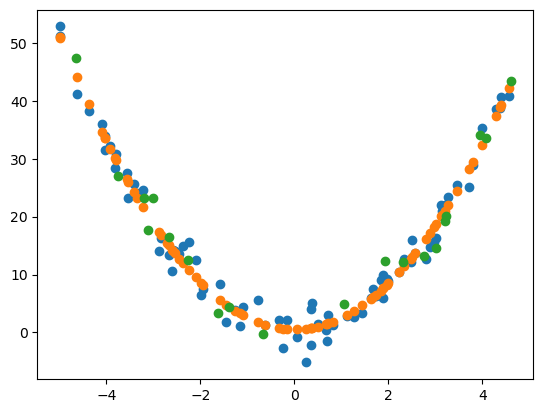

In [38]:
plt.scatter(X_train[:, 1],y_train)
y_pred_range= model.predict(X_train[:,1:])
plt.scatter(X_train[:,1], y_pred_range)
plt.scatter(X_test[:, 1],y_test)